# Session: Hands on working experience with AI/Machine Learning



## Introduction to Machine Learning

### Definition and Basic Concepts

Machine Learning is a subfield of artificial intelligence (AI) that focuses on developing algorithms and models that enable computers to learn and make predictions or decisions without being explicitly programmed. It involves extracting patterns and insights from data to automatically improve performance on a specific task.

Machine learning relies on the following key concepts:

- **Data**: Machine learning algorithms require data to learn from. This data can be in the form of structured or unstructured data, such as numerical values, images, text, etc.

- **Training**: During the training phase, a machine learning model is fed with labeled data, where the input features are associated with the correct output or target variable. The model learns from this data to make predictions on new, unseen data.

- **Inference**: Once trained, the model can be used for making predictions or decisions on new, unseen data.

### Types of Machine Learning

There are three main types of machine learning:

1. **Supervised Learning**: In supervised learning, the model learns from labeled data, where the input features are associated with the correct output or target variable. It aims to generalize patterns from the training data to make accurate predictions on unseen data.

2. **Unsupervised Learning**: Unsupervised learning deals with unlabeled data, where the model aims to find hidden patterns or structures in the data without any predefined labels. Clustering and dimensionality reduction are common tasks in unsupervised learning.

3. **Reinforcement Learning**: Reinforcement learning involves an agent learning to make decisions in an environment to maximize a reward signal. The agent receives feedback in the form of rewards or penalties based on its actions, enabling it to learn the optimal policy through trial and error.





### SUPERVISED LEARNING


#### LINEAR REGRESSION

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Input data
areas = np.array([1200, 1500, 1700, 2000, 2200, 2500, 3000, 3500, 4000, 4500])
prices = np.array([100000, 130000, 135000, 180000, 200000, 210000, 280000, 300000, 380000, 400000])


# Reshape the input arrays to match the expected shape of the linear regression model
areas = areas.reshape(-1, 1)
prices = prices.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(areas, prices)

# Predict the price of a house with an area of 2600 sqft
new_area = np.array([[2600]])
predicted_price = model.predict(new_area)
print(f"The predicted price for a house with an area of {new_area[0][0]} sqft is ${predicted_price[0][0]}")


The predicted price for a house with an area of 2600 sqft is $230561.13675445743


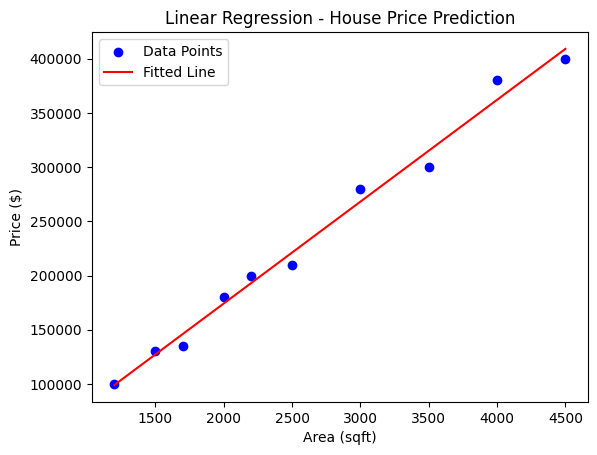

In [2]:
import matplotlib.pyplot as plt

# Plotting the data and the fitted line
plt.scatter(areas, prices, color='b', label='Data Points')
plt.plot(areas, model.predict(areas), color='r', label='Fitted Line')
plt.xlabel('Area (sqft)')
plt.ylabel('Price ($)')
plt.title('Linear Regression - House Price Prediction')
plt.legend()
plt.show()

#### DECISION TREE (CLASSIFICATION)

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

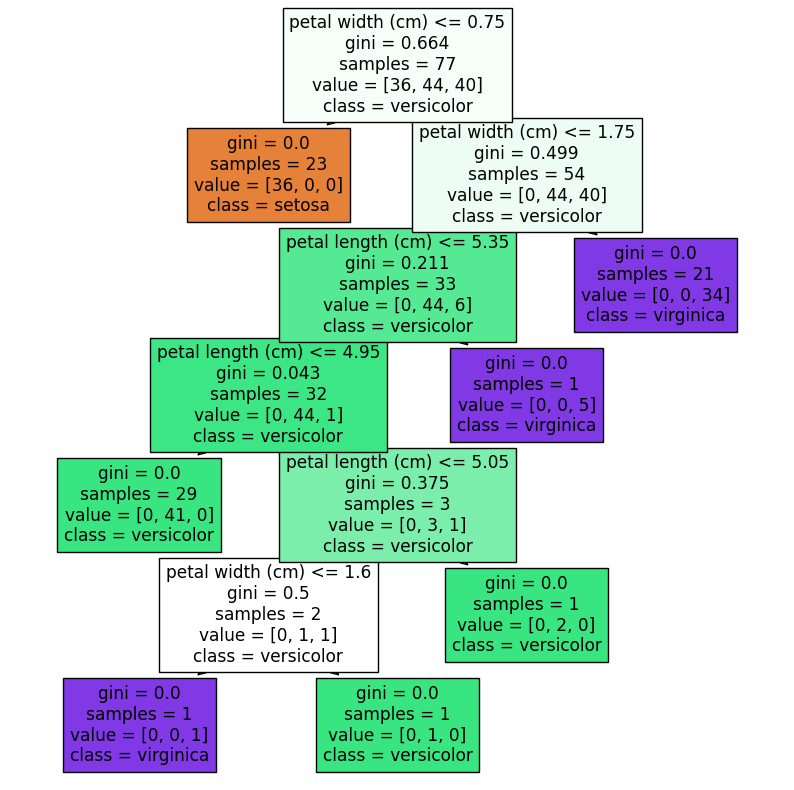

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 10 trees
rf = RandomForestClassifier(n_estimators=10)

# Train the model
rf.fit(X_train, y_train)

# Plot one of the decision trees in the Random Forest
plt.figure(figsize=(10, 10))
plot_tree(rf.estimators_[0], feature_names=iris.feature_names, class_names=class_names, filled=True)
plt.show()




In the context of decision trees, entropy is a measure of impurity or disorder in a dataset. It is used as a criterion to determine the optimal splitting of nodes during the construction of a decision tree. The concept of entropy comes from information theory and is closely related to the idea of uncertainty.

In decision tree algorithms, entropy is calculated for each potential split of a node based on the target variable's distribution (the variable to be predicted). The goal is to find the split that maximally reduces the entropy, leading to a more homogeneous and informative subset of data in each branch.

The formula to calculate entropy is typically based on Shannon's entropy formula and is given by:

Entropy = - Σ (p_i * log2(p_i))

Gini impurity: This measure seeks to minimize the probability of misclassifying a randomly selected element from the dataset. When splitting a node, the Gini impurity calculates the impurity of each potential split and selects the split with the lowest Gini impurity. The split that results in the least class on one side is considered optimal as it leads to the lowest impurity.

In [19]:
# Make predictions
y_pred = rf.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [20]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### EVALUATION OF SUPERVISED LEARNING MOGELS

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix:


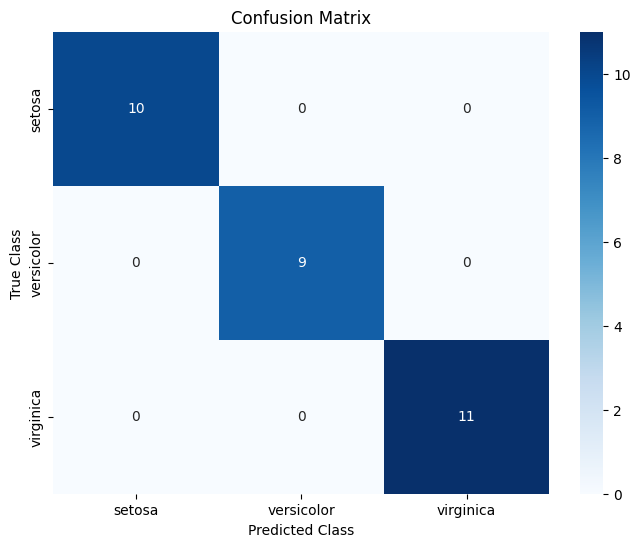

In [ ]:

import seaborn as sns


print("Confusion Matrix:")
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(confusion_mat, index=iris.target_names, columns=iris.target_names)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

#### K - Nearest Neighbour

### UNSUPERVISED LEARNING


#### K - Means Clustering

/home/muhammadhaider/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


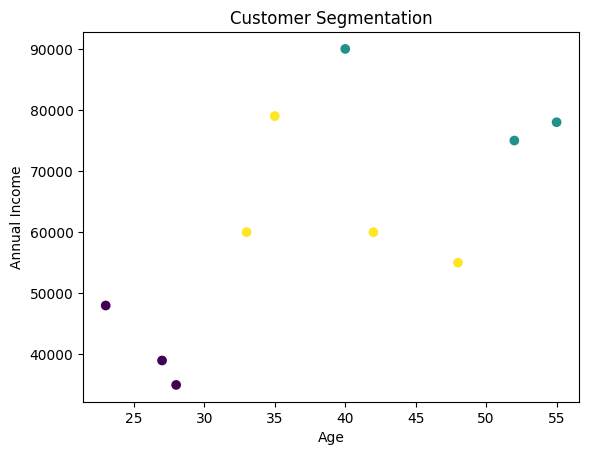

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Example customer data
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [23, 42, 35, 52, 28, 40, 55, 48, 33, 27],
    'AnnualIncome': [48000, 60000, 79000, 75000, 35000, 90000, 78000, 55000, 60000, 39000],
    'SpendingScore': [75, 63, 85, 45, 68, 20, 10, 55, 30, 62]
}

df = pd.DataFrame(data)

# Selecting features for clustering
X = df[['Age', 'AnnualIncome', 'SpendingScore']]



# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Creating the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the model to the data
kmeans.fit(X_scaled)

# Getting the cluster labels for each data point
labels = kmeans.labels_

# Adding the labels to the DataFrame
df['Cluster'] = labels

# Visualizing the clusters
plt.scatter(df['Age'], df['AnnualIncome'], c=df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Customer Segmentation')
plt.show()


#### Princple Component Analysis


Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify complex datasets by transforming them into a smaller set of variables called principal components. The goal is to retain the most important information in the data while minimizing the loss of information.

Here's a basic explanation of how PCA works:

Data Standardization: The first step in PCA is often to standardize the data by subtracting the mean and scaling each feature to have unit variance. This step ensures that all variables are on the same scale and avoids biases due to differences in measurement units.

Covariance Matrix: PCA calculates the covariance matrix of the standardized data. The covariance measures the relationship between pairs of variables and indicates how they vary together.

Eigendecomposition: The next step is to perform an eigendecomposition of the covariance matrix. This decomposition yields a set of eigenvalues and corresponding eigenvectors.

Eigenvalues and Eigenvectors: The eigenvalues represent the amount of variance explained by each eigenvector (principal component). The eigenvectors represent the direction or pattern in the data.

Ordering Eigenvalues: The eigenvalues are arranged in descending order, indicating the amount of variance explained by each principal component. This allows us to identify the most important components that capture the most significant variation in the data.

Selection of Principal Components: The next step is to select the desired number of principal components to retain. This selection is based on a trade-off between the amount of information retained and the desired dimensionality reduction.

Projection: Finally, the selected principal components are used to project the original data onto a new lower-dimensional space. This transformation is achieved by multiplying the standardized data by the matrix composed of the selected eigenvectors.

The resulting transformed data consists of the principal components, which are linear combinations of the original variables. Each principal component represents a different pattern or direction in the data, with the first component explaining the highest amount of variance, followed by subsequent components in descending order of variance explained.

PCA allows for data visualization, feature selection, and dimensionality reduction, making it useful for exploratory data analysis, noise reduction, and preparing data for downstream tasks such as clustering or classification.

In summary, PCA reduces the dimensionality of complex datasets by finding the most important patterns or directions of variation in the data. It achieves this by calculating the covariance matrix, performing eigendecomposition, and selecting the principal components that capture the most significant variation.

Correlation Heatmap


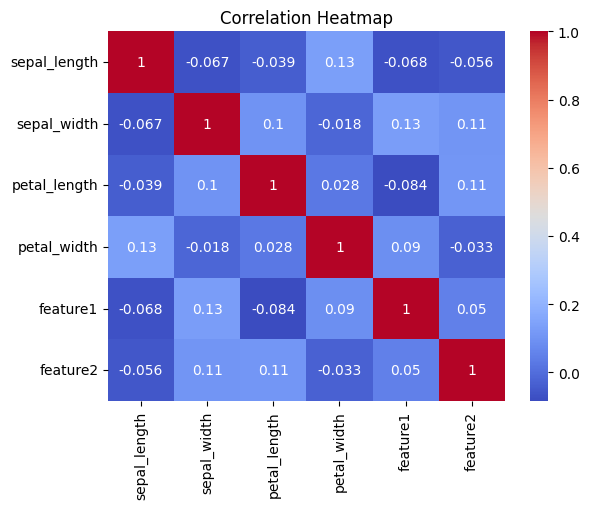

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a dictionary of features
features = {
    'sepal_length': np.random.normal(5.0, 0.5, 100),
    'sepal_width': np.random.normal(3.5, 0.5, 100),
    'petal_length': np.random.normal(1.5, 0.3, 100),
    'petal_width': np.random.normal(0.2, 0.05, 100),
    'feature1': np.random.normal(10, 2, 100),
    'feature2': np.random.normal(20, 3, 100),
    'class': np.random.choice(['Setosa', 'Versicolor', 'Virginica'], size=100)
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(features)

# Calculate the correlation matrix
correlation_matrix = df.iloc[:, :-1].corr()


print('Correlation Heatmap')
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


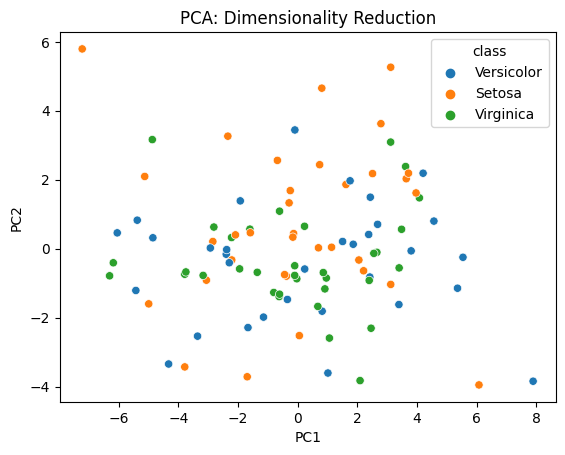

In [35]:

# Separate the features from the target variable
X = df.iloc[:, :-1]

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the reduced dimensions
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['class'] = df['class']

# Visualize the reduced dimensions
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='class')
plt.title("PCA: Dimensionality Reduction")
plt.show()

### Feature Engineering:

Importance of feature engineering.

Handling missing data and outliers.

Feature scaling and normalization.

Feature selection techniques.

### Deeplearning

Deep learning is a powerful subset of machine learning that is analogus to the way the human brain processes information. It involves training artificial neural networks with multiple layers to automatically discover complex patterns and relationships within large sets of data.

what is a neuron? 

fundemenally a thing that holds a number ;D range(0,1) 

consider each feature corresponds to a neuron in the input layer, the number is known as Activation, when the activation is a high number the neuron lits up (learn about this later) 

 

There are three layers In total 

Input, hidden, output  

activations in one layer determines the activation in next layer, some groups of neurons casues others to fire in the layer 

The hidden layer could be reffered as sub components or a grain feature, for instance 

 

consider a house price pridection example, for instrance take the inputs number of bedrooms, num 

 

The bias value allows the activation function to be shifted to the left or right, to better fit the data. Hence changes to the weights alter the steepness of the sigmoid curve, whilst the bias offsets it, shifting the entire curve so it fits better. Note also how the bias only influences the output values, it doesn’t interact with the actual input data. 

#### Artificial Neural Network

 

In brain our neurons are connected to one antoher through nerve extensions that transfer elcertomegnetic waves throught the network. 

When the first neuron is stimulated and processes the input if a certain thershhold is exeeded it is activated and it passes on to the connected neuron. Overtime these connections are made stronger due to frequency of that spicific activity recocurring  

 

The working of an artificial neural network are also very similar to this. 

[sf cheatsheet](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning)

Epoch: 50, Loss: 1026.2510986328125
Epoch: 100, Loss: 937.074951171875
Epoch: 150, Loss: 896.0230102539062
Epoch: 200, Loss: 849.5640869140625
Epoch: 250, Loss: 793.646728515625
Epoch: 300, Loss: 722.5408935546875
Epoch: 350, Loss: 628.7865600585938
Epoch: 400, Loss: 505.4919128417969
Epoch: 450, Loss: 354.2587585449219
Epoch: 500, Loss: 197.76756286621094
Epoch: 550, Loss: 78.08411407470703
Epoch: 600, Loss: 19.509695053100586
Epoch: 650, Loss: 2.9831223487854004
Epoch: 700, Loss: 0.29912108182907104
Epoch: 750, Loss: 0.021736789494752884
Epoch: 800, Loss: 0.0012177984463050961
Epoch: 850, Loss: 5.3474494052352384e-05
Epoch: 900, Loss: 1.826279572014755e-06
Epoch: 950, Loss: 4.55020696676911e-08
Epoch: 1000, Loss: 4.0243985921506464e-09


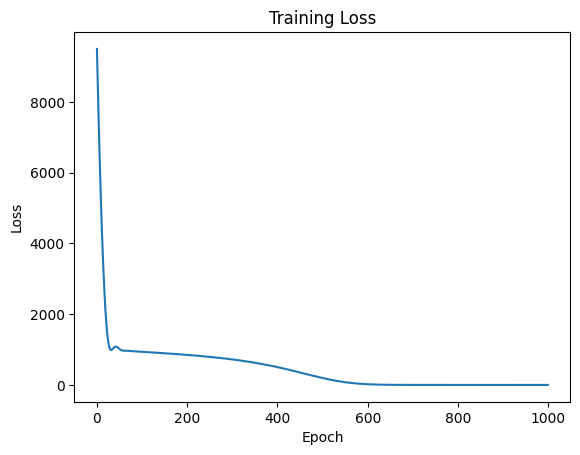

In [9]:
import torch
import torch.nn as nn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the temperature dataset
temp_df = pd.read_csv('/home/muhammadhaider/repo/ml_learning/temprature_dataset.csv')

# # Plot the data
# sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])
# plt.show()

# Prepare the data
X_train = torch.tensor(temp_df['Celsius'].values, dtype=torch.float).view(-1, 1)
y_train = torch.tensor(temp_df['Fahrenheit'].values, dtype=torch.float).view(-1, 1)

# Define the model
model = nn.Sequential(

    nn.Linear(1, 32),
    nn.Linear(32, 32),
    nn.Linear(32, 1)
    # nn.Linear(1,1)
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 1000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item()}')
        

# Plot the training loss
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [10]:
# Predict the value for 24 degrees Celsius
X_test = torch.tensor([24.0], dtype=torch.float).view(-1, 1)
predicted = model(X_test)   

# Convert the predicted value to Fahrenheit
predicted_fahrenheit = predicted.item()

print(f'Predicted Fahrenheit value for 24 degrees Celsius: {predicted_fahrenheit}')


Predicted Fahrenheit value for 24 degrees Celsius: 75.19993591308594
